In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [2]:
#Importamos datos

url = ("https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-machine-learning-python/master/data/SaratogaHouses.csv")
data = pd.read_csv(url)
data.head()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


In [3]:
data.tail()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
1723,289000,0.38,32,24200,2310,61,5,1,2.5,11,hot water/steam,gas,public/commercial,No,No,No
1724,285000,0.94,37,36200,2564,61,4,1,2.5,11,hot water/steam,gas,public/commercial,No,No,No
1725,194900,0.39,9,20400,1099,51,2,0,1.0,3,hot air,gas,public/commercial,No,No,No
1726,125000,0.24,48,16800,1225,51,3,1,1.0,7,hot air,gas,public/commercial,No,No,No
1727,111300,0.59,86,26000,1959,51,3,0,1.0,6,hot air,gas,septic,No,No,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1728 non-null   int64  
 1   lotSize          1728 non-null   float64
 2   age              1728 non-null   int64  
 3   landValue        1728 non-null   int64  
 4   livingArea       1728 non-null   int64  
 5   pctCollege       1728 non-null   int64  
 6   bedrooms         1728 non-null   int64  
 7   fireplaces       1728 non-null   int64  
 8   bathrooms        1728 non-null   float64
 9   rooms            1728 non-null   int64  
 10  heating          1728 non-null   object 
 11  fuel             1728 non-null   object 
 12  sewer            1728 non-null   object 
 13  waterfront       1728 non-null   object 
 14  newConstruction  1728 non-null   object 
 15  centralAir       1728 non-null   object 
dtypes: float64(2), int64(8), object(6)
memory usage: 216.1+ KB


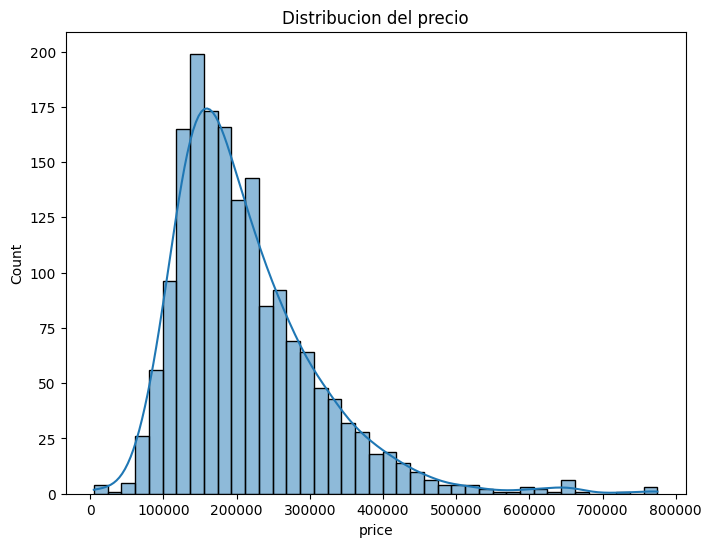

In [7]:
fig, ax = plt.subplots(1,1,figsize = (8,6))
sns.histplot(data = data, x = 'price', kde = True, ax=ax)
ax.set_title('Distribucion del precio')
plt.show()

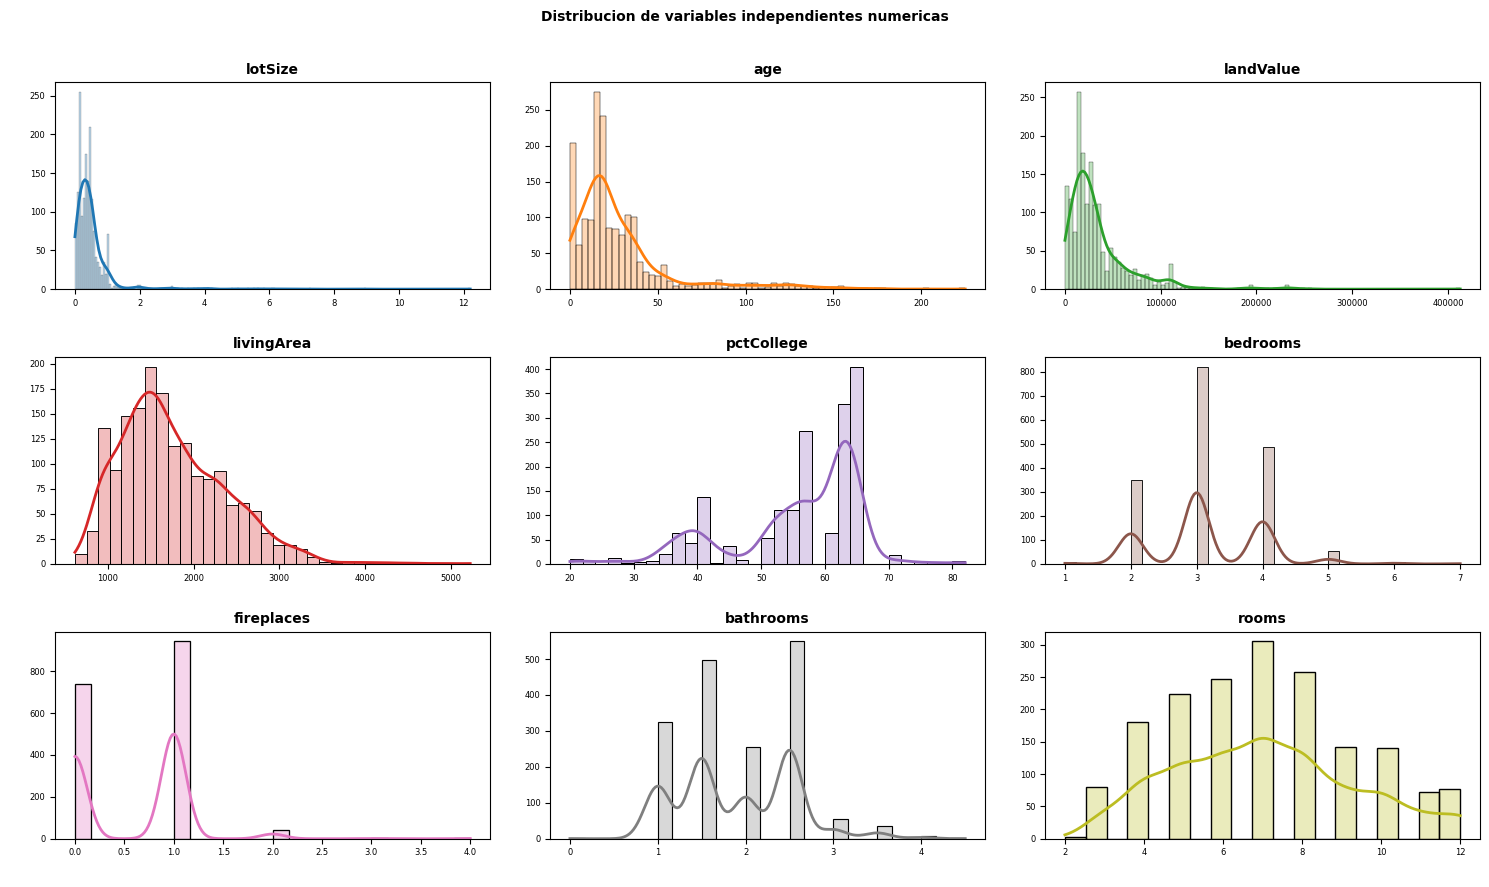

In [9]:
fig, ax = plt.subplots(3,3,figsize=(15,9))
ax = ax.flat
numCol = data.select_dtypes(include=['float64','int64']).columns
numCol = numCol.drop('price')

for i, col in enumerate(numCol):
    sns.histplot(data=data, 
                 x = col,
                 stat = 'count', 
                 kde = True,
                 color = (list(plt.rcParams['axes.prop_cycle'])*2)[i]['color'],
                 line_kws = {'linewidth': 2},
                 alpha = 0.3,
                 ax=ax[i],                
                 )
    ax[i].set_title(col, fontsize = 10, fontweight = 'bold')
    ax[i].tick_params(labelsize = 6)
    ax[i].set_xlabel(' ')
    ax[i].set_ylabel(' ')

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle("Distribucion de variables independientes numericas", fontsize = 10, fontweight = "bold")
plt.show()

In [10]:
data.describe()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,211966.705440,0.500214,27.916088,34557.187500,1754.975694,55.567708,3.154514,0.601852,1.900174,7.041667
std,98441.391015,0.698680,29.209988,35021.168056,619.935553,10.333581,0.817351,0.556102,0.658352,2.316453
min,5000.000000,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,0.000000,0.000000,2.000000
25%,145000.000000,0.170000,13.000000,15100.000000,1300.000000,52.000000,3.000000,0.000000,1.500000,5.000000
50%,189900.000000,0.370000,19.000000,25000.000000,1634.500000,57.000000,3.000000,1.000000,2.000000,7.000000
75%,259000.000000,0.540000,34.000000,40200.000000,2137.750000,64.000000,4.000000,1.000000,2.500000,8.250000
max,775000.000000,12.200000,225.000000,412600.000000,5228.000000,82.000000,7.000000,4.000000,4.500000,12.000000


Text(0.5, 0.98, 'Comportamiento de variables categoritcas')

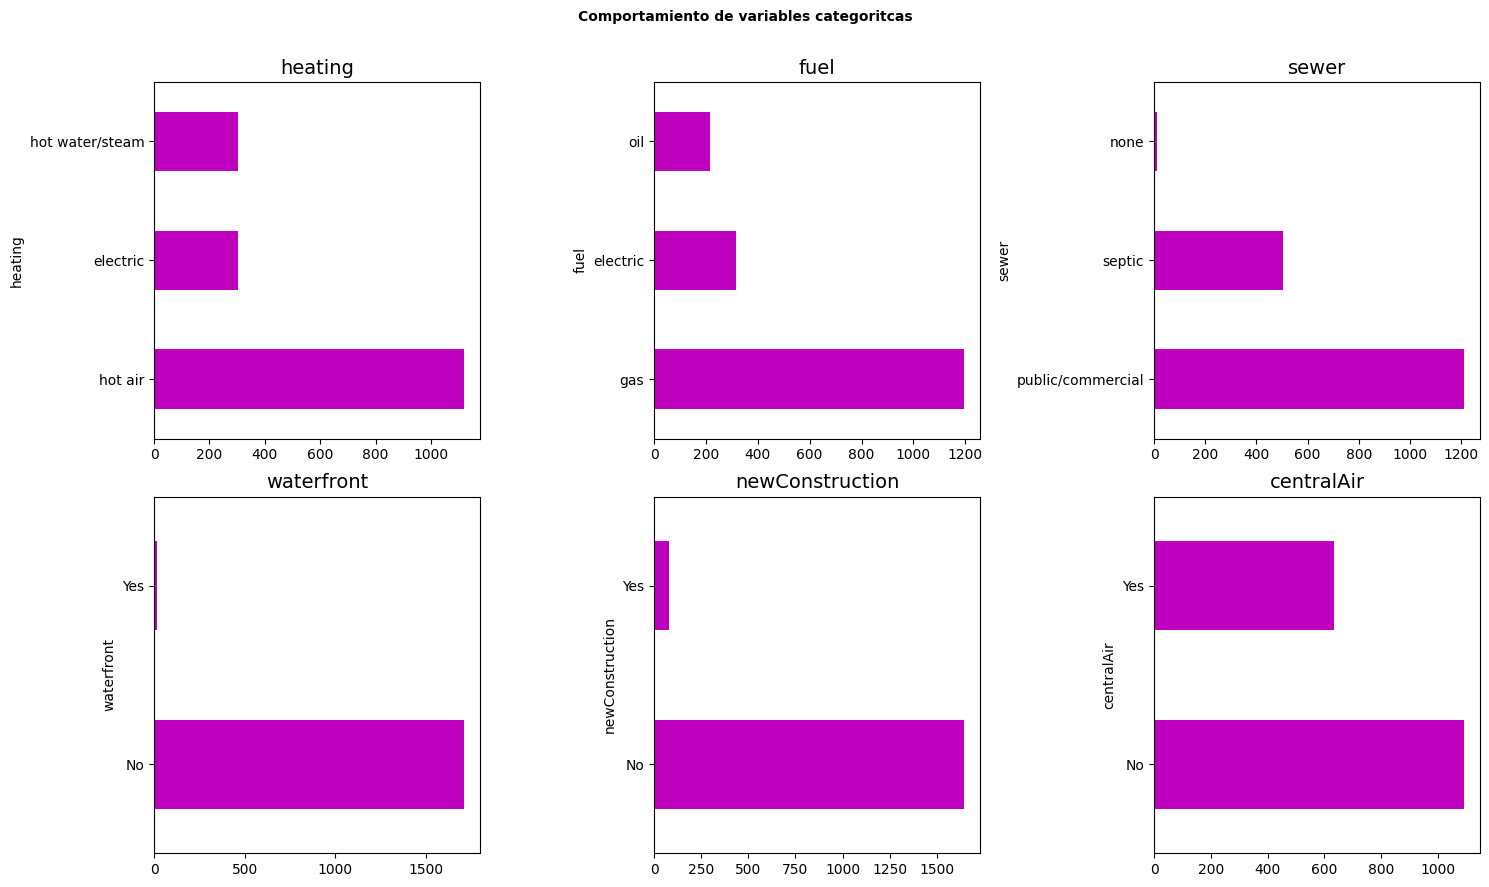

In [13]:
fig, ax = plt.subplots(2,3, figsize=(15,9))
ax = ax.flat
catCol = data.select_dtypes(include=['object']).columns

for i, col in enumerate(catCol):
    data[col].value_counts().plot.barh(ax = ax[i], color = 'm')
    ax[i].set_title(col, fontsize = 14)
    ax[i].set_xlabel('')

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Comportamiento de variables categoritcas', fontsize = 10, fontweight = 'bold')

In [15]:
data.describe(include='object')

,heating,fuel,sewer,waterfront,newConstruction,centralAir
count,1728,1728,1728,1728,1728,1728
unique,3,3,3,2,2,2
top,hot air,gas,public/commercial,No,No,No
freq,1121,1197,1213,1713,1647,1093


In [16]:
data.drop(['waterfront', 'newConstruction','lotSize'], axis = 1, inplace=True)
data.head()

,price,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,centralAir
0,132500,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No
1,181115,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No
2,109000,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No
3,155000,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No
4,86060,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,Yes


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       1728 non-null   int64  
 1   age         1728 non-null   int64  
 2   landValue   1728 non-null   int64  
 3   livingArea  1728 non-null   int64  
 4   pctCollege  1728 non-null   int64  
 5   bedrooms    1728 non-null   int64  
 6   fireplaces  1728 non-null   int64  
 7   bathrooms   1728 non-null   float64
 8   rooms       1728 non-null   int64  
 9   heating     1728 non-null   object 
 10  fuel        1728 non-null   object 
 11  sewer       1728 non-null   object 
 12  centralAir  1728 non-null   object 
dtypes: float64(1), int64(8), object(4)
memory usage: 175.6+ KB


In [19]:
#Procesamiento de datos

numCols = data.select_dtypes(include=['float64', 'Int64']).columns.tolist()
catCols = data.select_dtypes(include=['object']).columns.to_list()

numTransformer = Pipeline(steps= [('scaler', MinMaxScaler())])
catTransformer = Pipeline(steps= [('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocesador = ColumnTransformer(transformers= [
    ('num', numTransformer, numCols),
    ('cat', catTransformer, catCols)
], remainder='passthrough')

preprocesador

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,feature_range,"(0, ...)"
,copy,True
,clip,False


In [20]:
dataPre = preprocesador.fit_transform(data)
codCat = preprocesador.named_transformers_['cat']['onehot'].get_feature_names_out(catCols)
labels = np.concatenate([numCol, codCat])
dataPro = pd.DataFrame(dataPre, columns=labels)
dataPro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   lotSize                  1728 non-null   float64
 1   age                      1728 non-null   float64
 2   landValue                1728 non-null   float64
 3   livingArea               1728 non-null   float64
 4   pctCollege               1728 non-null   float64
 5   bedrooms                 1728 non-null   float64
 6   fireplaces               1728 non-null   float64
 7   bathrooms                1728 non-null   float64
 8   rooms                    1728 non-null   float64
 9   heating_electric         1728 non-null   float64
 10  heating_hot air          1728 non-null   float64
 11  heating_hot water/steam  1728 non-null   float64
 12  fuel_electric            1728 non-null   float64
 13  fuel_gas                 1728 non-null   float64
 14  fuel_oil                